In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, LabelEncoder

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split


# 일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용한다.

# 또한, cross_val_score 함수에는 KFold의 매개변수를 제어할 수가 없으므로, 

# 따로 KFold 객체를 만들고 매개변수를 조정한 다음에 cross_val_score의 cv 매개변수에 넣어야 한다.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, make_scorer, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

import warnings         # warnings : 버전 충돌 및 특정 예외 처리를 위해 불러온 내장 모듈
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
train= pd.read_csv('./train_dummies.csv')

In [3]:
test= pd.read_csv('./test_dummies.csv')

In [4]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# df_train 으로 데이터불러오기

In [5]:
y = train['y']
y.shape

(22605,)

In [6]:
X = train.drop(['y'], axis=1)
X.shape

(22605, 31)

In [437]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [438]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(18084, 14), 테스트 세트 Shape:(4521, 14)
 학습 세트 레이블 값 분포 비율
False    0.88111
True     0.11889
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.881221
True     0.118779
Name: y, dtype: float64


In [14]:
import sklearn.metrics as metrics

In [15]:
# Light GBM

lgbm_clf = LGBMClassifier(n_estimators=400, n_jobs = -1)
lgbm_clf.fit(X_train, y_train)
lgbm_clf_pred = lgbm_clf.predict(X_test)

lgbm_clf_cv_pre = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
lgbm_clf_cv_rec = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
lgbm_clf_cv_f1 = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Light GBM is ', metrics.precision_score(lgbm_clf_pred, y_test))
print('Recall for Light GBM is ', metrics.recall_score(lgbm_clf_pred, y_test))
print('F1_score for Light GBM is ', metrics.f1_score(lgbm_clf_pred, y_test))
print()
print('The cross validated precision for Light GBM is:', lgbm_clf_cv_pre.mean())
print('The cross validated recall for Light GBM is:', lgbm_clf_cv_rec.mean())
print('The cross validated f1_score for Light GBM is:', lgbm_clf_cv_f1.mean())

Precision for Light GBM is  0.33891992551210426
Recall for Light GBM is  0.44390243902439025
F1_score for Light GBM is  0.3843717001055967

The cross validated precision for Light GBM is: 0.9371140701446432
The cross validated recall for Light GBM is: 0.8905886874902038
The cross validated f1_score for Light GBM is: 0.8976748700763014


In [14]:
import sklearn.metrics as metrics

# 오버 샘플링¶
- RandomOverSampler: random sampler
- ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning
- SMOTE: Synthetic Minority Over-sampling Technique
- BoarderlineSMOTE
- SVMSMOTE

In [8]:
from imblearn.over_sampling import *

### RandomOverSampler
- Random Over Sampling은 소수 클래스의 데이터를 반복해서 넣는 것(replacement)이다. 가중치를 증가시키는 것과 비슷하다.

In [237]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [238]:
X_train, y_train = RandomOverSampler(random_state=0).fit_sample(X_train, y_train)

In [239]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(31868, 31), 테스트 세트 Shape:(4521, 31)
 학습 세트 레이블 값 분포 비율
True     0.5
False    0.5
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.881221
True     0.118779
Name: y, dtype: float64


In [24]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1_score = metrics.f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1_score: {2: 4f}'.format(accuracy , precision ,recall, f1_score))

## GridSearchCV

In [240]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, verbose=3, n_jobs=-1, cv=3)

In [241]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="f1",
           eval_set=[(X_train, y_train), (X_test, y_test)])

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   35.5s finished


[1]	training's binary_logloss: 0.665222	valid_1's binary_logloss: 0.665651
Training until validation scores don't improve for 30 rounds
[2]	training's binary_logloss: 0.641607	valid_1's binary_logloss: 0.642933
[3]	training's binary_logloss: 0.621542	valid_1's binary_logloss: 0.623581
[4]	training's binary_logloss: 0.604567	valid_1's binary_logloss: 0.607002
[5]	training's binary_logloss: 0.589827	valid_1's binary_logloss: 0.59275
[6]	training's binary_logloss: 0.577419	valid_1's binary_logloss: 0.580738
[7]	training's binary_logloss: 0.566404	valid_1's binary_logloss: 0.57012
[8]	training's binary_logloss: 0.55603	valid_1's binary_logloss: 0.560487
[9]	training's binary_logloss: 0.547382	valid_1's binary_logloss: 0.552614
[10]	training's binary_logloss: 0.538852	valid_1's binary_logloss: 0.544756
[11]	training's binary_logloss: 0.531058	valid_1's binary_logloss: 0.538008
[12]	training's binary_logloss: 0.524208	valid_1's binary_logloss: 0.532159
[13]	training's binary_logloss: 0.51803

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=400), n_jobs=-1,
             param_grid={'max_depth': [128, 160],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsample': [0.8, 1]},
             verbose=3)

In [242]:
gridcv.best_estimator_

LGBMClassifier(max_depth=128, min_child_samples=60, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [243]:
lgbm_clf_best = LGBMClassifier(max_depth=128, min_child_samples=60, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [244]:
lgbm_clf_best.fit(X_train, y_train)

LGBMClassifier(max_depth=128, min_child_samples=60, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [246]:
##

pred_proba = lgbm_clf_best.predict_proba(X_test)
pred  = lgbm_clf_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.97518117 0.02481883]
 [0.94793116 0.05206884]
 [0.95178077 0.04821923]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.97518117 0.02481883 0.97518117 0.02481883]
 [0.94793116 0.05206884 0.94793116 0.05206884]
 [0.95178077 0.04821923 0.95178077 0.04821923]]


In [247]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3650  334]
 [ 318  219]]
정확도: 0.8558, 정밀도: 0.3960, 재현율: 0.4078, F1_score:  0.407821


In [248]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_best.predict_proba(X_test)[:, 1] 


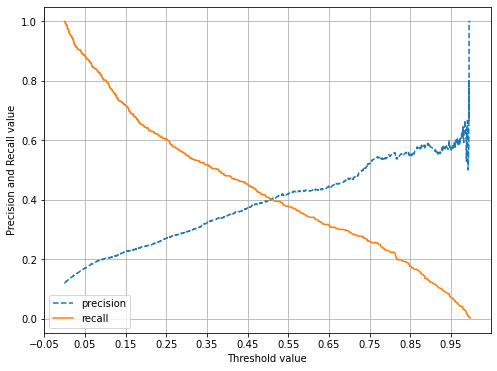

In [249]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] )


In [250]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_best, X_test, y_test)

(0.46, 0.4089)

In [251]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.46
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3595  389]
 [ 299  238]]
정확도: 0.8478, 정밀도: 0.3796, 재현율: 0.4432, F1_score:  0.443203


In [279]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.46).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_오버샘플링랜덤_임계점_0.46_그리드서치.csv', index = False)

## RandomizedGridsearchCV

In [253]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [254]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

lg_cl = LGBMClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.8min finished


LGBMClassifier(bootstrap=False, max_depth=80, max_features='auto',
               min_samples_leaf=4, min_samples_split=10, n_estimators=2000)


In [255]:
lgb_random_best = LGBMClassifier(bootstrap=False, max_depth=80, max_features='auto',
               min_samples_leaf=4, min_samples_split=10, n_estimators=2000)

In [256]:
lgb_random_best.fit(X_train, y_train)

LGBMClassifier(bootstrap=False, max_depth=80, max_features='auto',
               min_samples_leaf=4, min_samples_split=10, n_estimators=2000)

In [257]:
## 1 ##

pred_proba = lgb_random_best.predict_proba(X_test)
pred  = lgb_random_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.9902161  0.0097839 ]
 [0.98434185 0.01565815]
 [0.99619504 0.00380496]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.9902161  0.0097839  0.9902161  0.0097839 ]
 [0.98434185 0.01565815 0.98434185 0.01565815]
 [0.99619504 0.00380496 0.99619504 0.00380496]]


In [258]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3793  191]
 [ 377  160]]
정확도: 0.8744, 정밀도: 0.4558, 재현율: 0.2980, F1_score:  0.297952


In [259]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgb_random_best.predict_proba(X_test)[:, 1] ###


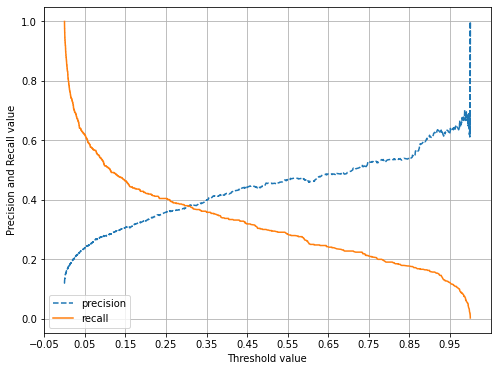

In [260]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgb_random_best.predict_proba(X_test)[:, 1]) ##


In [261]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgb_random_best, X_test, y_test)

(0.25, 0.38)

In [262]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.25
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3596  388]
 [ 320  217]]
정확도: 0.8434, 정밀도: 0.3587, 재현율: 0.4041, F1_score:  0.404097


In [280]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgb_random_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.25).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_오버샘플링랜덤_0.25_랜덤서치.csv', index = False)

## BaysianOptimization

In [265]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [266]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [267]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [268]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 33, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 10, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.786406	valid_0's binary_logloss: 0.527358
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.786435	valid_0's binary_logloss: 0.527762
best_iter: 99
roc_auc: 0.7864348455273608
|  1        |  0.7864   |  0.7744   |  9.722    |  32.12    |  0.05494  |  32.9     |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, '

In [269]:
BO_lgb.max

{'target': 0.7890799697860342,
 'params': {'colsample_bytree': 0.5591372129344666,
  'max_depth': 9.119368170620191,
  'min_child_weight': 11.450897933407088,
  'min_split_gain': 0.09452222278790881,
  'num_leaves': 34.95881475675151,
  'reg_alpha': 0.2073309699952618,
  'reg_lambda': 0.13227780605231348,
  'subsample': 0.8871168447171083}}

In [270]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.72895	valid_0's binary_logloss: 0.688979
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.735936	valid_0's binary_logloss: 0.685704
[3]	valid_0's auc: 0.737784	valid_0's binary_logloss: 0.682212
[4]	valid_0's auc: 0.751575	valid_0's binary_logloss: 0.678644
[5]	valid_0's auc: 0.755355	valid_0's binary_logloss: 0.67528
[6]	valid_0's auc: 0.754978	valid_0's binary_logloss: 0.671726
[7]	valid_0's auc: 0.756926	valid_0's binary_logloss: 0.668532
[8]	valid_0's auc: 0.763861	valid_0's binary_logloss: 0.665046
[9]	valid_0's auc: 0.770785	valid_0's binary_logloss: 0.660733
[10]	valid_0's auc: 0.77001	valid_0's binary_logloss: 0.658014
[11]	valid_0's auc: 0.774091	valid_0's binary_logloss: 0.653894
[12]	valid_0's auc: 0.773821	valid_0's binary_logloss: 0.651858
[13]	valid_0's auc: 0.77632	valid_0's binary_logloss: 0.647933
[14]	valid_0's auc: 0.778818	valid_0's binary_logloss: 0.644486
[15]	valid_0's auc: 0.777356	valid_0's binary_logloss: 

In [271]:
lgbm_clf_bayes_best

LGBMClassifier(colsample_bytree=0.5591372129344666, learning_rate=0.02,
               max_depth=9, min_child_weight=11.450897933407088,
               min_split_gain=0.09452222278790881, n_estimators=1000,
               num_leaves=35, reg_alpha=0.2073309699952618,
               reg_lambda=0.13227780605231348, subsample=0.8871168447171083)

In [272]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.5591372129344666, learning_rate=0.02,
               max_depth=9, min_child_weight=11.450897933407088,
               min_split_gain=0.09452222278790881, n_estimators=1000,
               num_leaves=35, reg_alpha=0.2073309699952618,
               reg_lambda=0.13227780605231348, subsample=0.8871168447171083)

In [273]:
## 1 ##

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.77719608 0.22280392]
 [0.85907896 0.14092104]
 [0.89191451 0.10808549]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.77719608 0.22280392 0.97518117 0.02481883]
 [0.85907896 0.14092104 0.94793116 0.05206884]
 [0.89191451 0.10808549 0.95178077 0.04821923]]


In [274]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3440  544]
 [ 224  313]]
정확도: 0.8301, 정밀도: 0.3652, 재현율: 0.5829, F1_score:  0.582868


In [275]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###


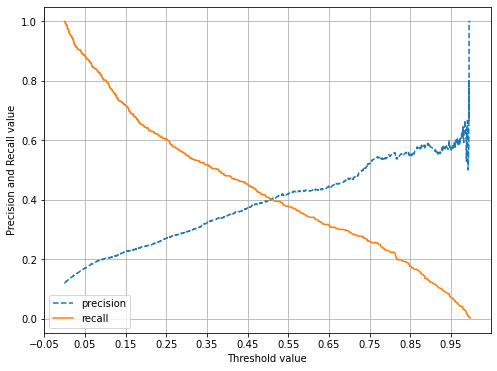

In [276]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] ) ####


In [277]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.51, 0.458)

In [278]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.51
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3474  510]
 [ 226  311]]
정확도: 0.8372, 정밀도: 0.3788, 재현율: 0.5791, F1_score:  0.579143


In [281]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_bayes_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.51).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_오버샘플링랜덤_임계점_0.51_베이즈튜닝.csv', index = False)

### ADASYN
- ADASYN(Adaptive Synthetic Sampling) 방법은 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법이다.

In [419]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [282]:
X_train, y_train = ADASYN(random_state=0).fit_sample(X_train, y_train)

In [283]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(31868, 31), 테스트 세트 Shape:(4521, 31)
 학습 세트 레이블 값 분포 비율
True     0.5
False    0.5
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.881221
True     0.118779
Name: y, dtype: float64


# GridsearchCV

In [284]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, verbose=3, n_jobs=-1, cv=3)

In [285]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="f1",
           eval_set=[(X_train, y_train), (X_test, y_test)])

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   37.4s finished


[1]	training's binary_logloss: 0.665222	valid_1's binary_logloss: 0.665651
Training until validation scores don't improve for 30 rounds
[2]	training's binary_logloss: 0.641607	valid_1's binary_logloss: 0.642933
[3]	training's binary_logloss: 0.621542	valid_1's binary_logloss: 0.623581
[4]	training's binary_logloss: 0.604567	valid_1's binary_logloss: 0.607002
[5]	training's binary_logloss: 0.589827	valid_1's binary_logloss: 0.59275
[6]	training's binary_logloss: 0.577419	valid_1's binary_logloss: 0.580738
[7]	training's binary_logloss: 0.566404	valid_1's binary_logloss: 0.57012
[8]	training's binary_logloss: 0.55603	valid_1's binary_logloss: 0.560487
[9]	training's binary_logloss: 0.547382	valid_1's binary_logloss: 0.552614
[10]	training's binary_logloss: 0.538852	valid_1's binary_logloss: 0.544756
[11]	training's binary_logloss: 0.531058	valid_1's binary_logloss: 0.538008
[12]	training's binary_logloss: 0.524208	valid_1's binary_logloss: 0.532159
[13]	training's binary_logloss: 0.51803

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=400), n_jobs=-1,
             param_grid={'max_depth': [128, 160],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsample': [0.8, 1]},
             verbose=3)

In [287]:
gridcv.best_estimator_

LGBMClassifier(max_depth=128, min_child_samples=60, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [289]:
lgbm_clf_best = LGBMClassifier(max_depth=128, min_child_samples=60, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [290]:
lgbm_clf_best.fit(X_train, y_train)

LGBMClassifier(max_depth=128, min_child_samples=60, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [291]:
##

pred_proba = lgbm_clf_best.predict_proba(X_test)
pred  = lgbm_clf_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.97518117 0.02481883]
 [0.94793116 0.05206884]
 [0.95178077 0.04821923]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.97518117 0.02481883 0.97518117 0.02481883]
 [0.94793116 0.05206884 0.94793116 0.05206884]
 [0.95178077 0.04821923 0.95178077 0.04821923]]


In [292]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3650  334]
 [ 318  219]]
정확도: 0.8558, 정밀도: 0.3960, 재현율: 0.4078, F1_score:  0.407821


In [293]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_best.predict_proba(X_test)[:, 1] 


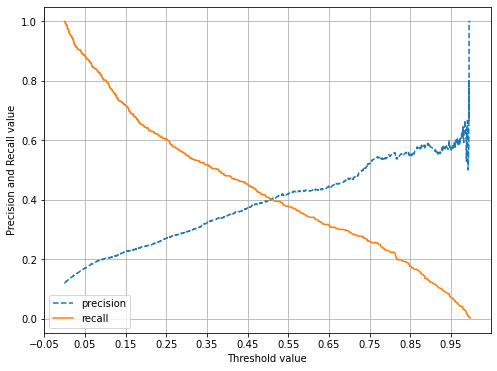

In [294]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] )


In [295]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_best, X_test, y_test)

(0.46, 0.4089)

In [296]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.46
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3595  389]
 [ 299  238]]
정확도: 0.8478, 정밀도: 0.3796, 재현율: 0.4432, F1_score:  0.443203


In [297]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.46).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_오버샘플링Adasyn_임계점_0.46_그리드서치.csv', index = False)

## RandomizedSearchCV

In [298]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [299]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

lg_cl = LGBMClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.4min finished


LGBMClassifier(bootstrap=True, max_depth=20, max_features='auto',
               min_samples_leaf=1, min_samples_split=2, n_estimators=2000)


In [300]:
lgb_random_best = LGBMClassifier(bootstrap=True, max_depth=20, max_features='auto',
               min_samples_leaf=1, min_samples_split=2, n_estimators=2000)

In [301]:
lgb_random_best.fit(X_train, y_train)

LGBMClassifier(bootstrap=True, max_depth=20, max_features='auto',
               min_samples_leaf=1, min_samples_split=2, n_estimators=2000)

In [302]:
## 1 ##

pred_proba = lgb_random_best.predict_proba(X_test)
pred  = lgb_random_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.99225736 0.00774264]
 [0.9967076  0.0032924 ]
 [0.99884801 0.00115199]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.99225736 0.00774264 0.99225736 0.00774264]
 [0.9967076  0.0032924  0.9967076  0.0032924 ]
 [0.99884801 0.00115199 0.99884801 0.00115199]]


In [303]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3790  194]
 [ 391  146]]
정확도: 0.8706, 정밀도: 0.4294, 재현율: 0.2719, F1_score:  0.271881


In [304]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgb_random_best.predict_proba(X_test)[:, 1] ###


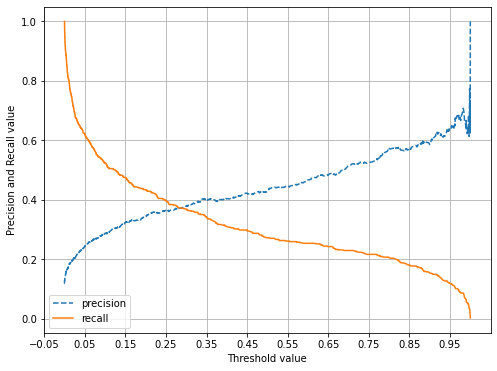

In [305]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgb_random_best.predict_proba(X_test)[:, 1]) ##


In [306]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgb_random_best, X_test, y_test)

(0.15, 0.3852)

In [307]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.15
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3452  532]
 [ 282  255]]
정확도: 0.8200, 정밀도: 0.3240, 재현율: 0.4749, F1_score:  0.474860


In [308]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgb_random_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.15).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_오버샘플링Adasyn_임계점_0.15_랜덤서치.csv', index = False)

## BaysianOptimization

In [309]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [310]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [311]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [312]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 33, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 10, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.786406	valid_0's binary_logloss: 0.527358
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.786435	valid_0's binary_logloss: 0.527762
best_iter: 99
roc_auc: 0.7864348455273608
|  1        |  0.7864   |  0.7744   |  9.722    |  32.12    |  0.05494  |  32.9     |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, '

In [313]:
BO_lgb.max

{'target': 0.7890799697860342,
 'params': {'colsample_bytree': 0.5591372129344666,
  'max_depth': 9.119368170620191,
  'min_child_weight': 11.450897933407088,
  'min_split_gain': 0.09452222278790881,
  'num_leaves': 34.95881475675151,
  'reg_alpha': 0.2073309699952618,
  'reg_lambda': 0.13227780605231348,
  'subsample': 0.8871168447171083}}

In [314]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.72895	valid_0's binary_logloss: 0.688979
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.735936	valid_0's binary_logloss: 0.685704
[3]	valid_0's auc: 0.737784	valid_0's binary_logloss: 0.682212
[4]	valid_0's auc: 0.751575	valid_0's binary_logloss: 0.678644
[5]	valid_0's auc: 0.755355	valid_0's binary_logloss: 0.67528
[6]	valid_0's auc: 0.754978	valid_0's binary_logloss: 0.671726
[7]	valid_0's auc: 0.756926	valid_0's binary_logloss: 0.668532
[8]	valid_0's auc: 0.763861	valid_0's binary_logloss: 0.665046
[9]	valid_0's auc: 0.770785	valid_0's binary_logloss: 0.660733
[10]	valid_0's auc: 0.77001	valid_0's binary_logloss: 0.658014
[11]	valid_0's auc: 0.774091	valid_0's binary_logloss: 0.653894
[12]	valid_0's auc: 0.773821	valid_0's binary_logloss: 0.651858
[13]	valid_0's auc: 0.77632	valid_0's binary_logloss: 0.647933
[14]	valid_0's auc: 0.778818	valid_0's binary_logloss: 0.644486
[15]	valid_0's auc: 0.777356	valid_0's binary_logloss: 

In [315]:
lgbm_clf_bayes_best

LGBMClassifier(colsample_bytree=0.5591372129344666, learning_rate=0.02,
               max_depth=9, min_child_weight=11.450897933407088,
               min_split_gain=0.09452222278790881, n_estimators=1000,
               num_leaves=35, reg_alpha=0.2073309699952618,
               reg_lambda=0.13227780605231348, subsample=0.8871168447171083)

In [316]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.5591372129344666, learning_rate=0.02,
               max_depth=9, min_child_weight=11.450897933407088,
               min_split_gain=0.09452222278790881, n_estimators=1000,
               num_leaves=35, reg_alpha=0.2073309699952618,
               reg_lambda=0.13227780605231348, subsample=0.8871168447171083)

In [317]:
## 1 ##

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.77719608 0.22280392]
 [0.85907896 0.14092104]
 [0.89191451 0.10808549]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.77719608 0.22280392 0.97518117 0.02481883]
 [0.85907896 0.14092104 0.94793116 0.05206884]
 [0.89191451 0.10808549 0.95178077 0.04821923]]


In [318]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3440  544]
 [ 224  313]]
정확도: 0.8301, 정밀도: 0.3652, 재현율: 0.5829, F1_score:  0.582868


In [319]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###


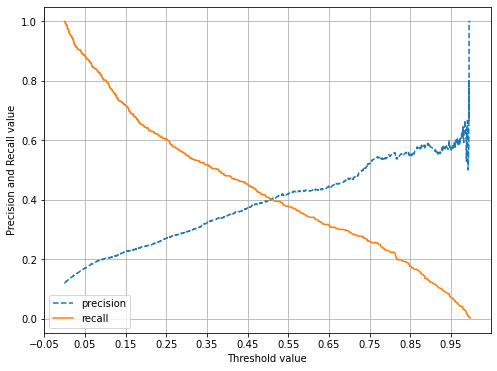

In [320]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] ) ####


In [321]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.51, 0.458)

In [322]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.51
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3474  510]
 [ 226  311]]
정확도: 0.8372, 정밀도: 0.3788, 재현율: 0.5791, F1_score:  0.579143


In [323]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_bayes_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.51).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_오버샘플링Adasyn_임계점_0.51_베이즈튜닝.csv', index = False)

## BoarderlineSMOTE

In [324]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [325]:
X_train, y_train = BorderlineSMOTE(random_state=0).fit_sample(X_train, y_train)

In [326]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(31868, 31), 테스트 세트 Shape:(4521, 31)
 학습 세트 레이블 값 분포 비율
True     0.5
False    0.5
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.881221
True     0.118779
Name: y, dtype: float64


# GridSearchCV

In [327]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, verbose=3, n_jobs=-1, cv=3)

In [328]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="f1",
           eval_set=[(X_train, y_train), (X_test, y_test)])

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   14.3s finished


[1]	training's binary_logloss: 0.640342	valid_1's binary_logloss: 0.647168
Training until validation scores don't improve for 30 rounds
[2]	training's binary_logloss: 0.597341	valid_1's binary_logloss: 0.609894
[3]	training's binary_logloss: 0.56131	valid_1's binary_logloss: 0.57822
[4]	training's binary_logloss: 0.526594	valid_1's binary_logloss: 0.550005
[5]	training's binary_logloss: 0.500054	valid_1's binary_logloss: 0.527062
[6]	training's binary_logloss: 0.475931	valid_1's binary_logloss: 0.507043
[7]	training's binary_logloss: 0.456136	valid_1's binary_logloss: 0.490059
[8]	training's binary_logloss: 0.439233	valid_1's binary_logloss: 0.476282
[9]	training's binary_logloss: 0.423178	valid_1's binary_logloss: 0.463467
[10]	training's binary_logloss: 0.410126	valid_1's binary_logloss: 0.452973
[11]	training's binary_logloss: 0.396968	valid_1's binary_logloss: 0.443157
[12]	training's binary_logloss: 0.381002	valid_1's binary_logloss: 0.431149
[13]	training's binary_logloss: 0.3676

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=400), n_jobs=-1,
             param_grid={'max_depth': [128, 160],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsample': [0.8, 1]},
             verbose=3)

In [329]:
gridcv.best_estimator_

LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [330]:
lgbm_clf_best = LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [331]:
lgbm_clf_best.fit(X_train, y_train)

LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [332]:
##

pred_proba = lgbm_clf_best.predict_proba(X_test)
pred  = lgbm_clf_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.9788478  0.0211522 ]
 [0.83220201 0.16779799]
 [0.10353695 0.89646305]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.9788478  0.0211522  0.9788478  0.0211522 ]
 [0.83220201 0.16779799 0.83220201 0.16779799]
 [0.10353695 0.89646305 0.10353695 0.89646305]]


In [333]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3772  212]
 [ 348  189]]
정확도: 0.8761, 정밀도: 0.4713, 재현율: 0.3520, F1_score:  0.351955


In [334]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_best.predict_proba(X_test)[:, 1] 


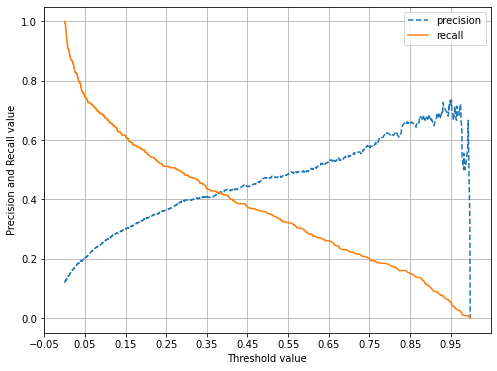

In [335]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] )


In [336]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_best, X_test, y_test)

(0.29, 0.4372)

In [337]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.29
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3581  403]
 [ 274  263]]
정확도: 0.8503, 정밀도: 0.3949, 재현율: 0.4898, F1_score:  0.489758


In [338]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.29).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_오버샘플링boarderline_임계점_0.29_그리드서치.csv', index = False)

## RandomizedSearchCV

In [339]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [340]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

lg_cl = LGBMClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished


LGBMClassifier(bootstrap=True, max_depth=20, max_features='sqrt',
               min_samples_leaf=4, min_samples_split=2, n_estimators=1600)


In [341]:
lgb_random_best = LGBMClassifier(bootstrap=True, max_depth=20, max_features='sqrt',
               min_samples_leaf=4, min_samples_split=2, n_estimators=1600)

In [342]:
lgb_random_best.fit(X_train, y_train)

LGBMClassifier(bootstrap=True, max_depth=20, max_features='sqrt',
               min_samples_leaf=4, min_samples_split=2, n_estimators=1600)

In [343]:
## 1 ##

pred_proba = lgb_random_best.predict_proba(X_test)
pred  = lgb_random_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.99463435 0.00536565]
 [0.88246578 0.11753422]
 [0.17116595 0.82883405]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.99463435 0.00536565 0.99463435 0.00536565]
 [0.88246578 0.11753422 0.88246578 0.11753422]
 [0.17116595 0.82883405 0.17116595 0.82883405]]


In [344]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3796  188]
 [ 363  174]]
정확도: 0.8781, 정밀도: 0.4807, 재현율: 0.3240, F1_score:  0.324022


In [345]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgb_random_best.predict_proba(X_test)[:, 1] ###


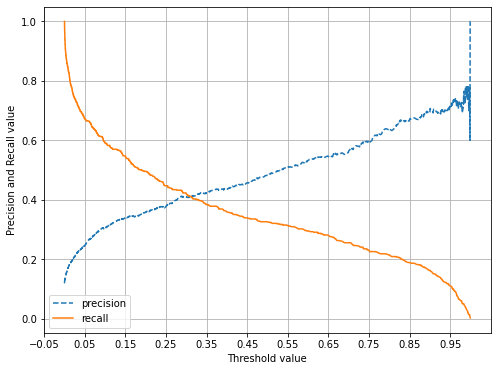

In [346]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgb_random_best.predict_proba(X_test)[:, 1]) ##


In [347]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgb_random_best, X_test, y_test)

(0.15, 0.4197)

In [348]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.15
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3414  570]
 [ 243  294]]
정확도: 0.8202, 정밀도: 0.3403, 재현율: 0.5475, F1_score:  0.547486


In [349]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgb_random_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.15).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_오버샘플링boarderline_임계점_0.15_랜덤서치.csv', index = False)

## BaysianOptimization

In [350]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [351]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [352]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [410]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 38, 'colsample_bytree': 0.679753950286893, 'subsample': 0.5644631488274267, 'max_depth': 7, 'reg_alpha': 0.3353189348090797, 'reg_lambda': 0.10519128053692045, 'min_split_gain': 0.006962321691297714, 'min_child_weight': 36.39340381672692, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.747897	valid_0's binary_logloss: 0.513098
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.747897	valid_0's binary_logloss: 0.513098
best_iter: 100
roc_auc: 0.747896614390523
|  16       |  0.7479   |  0.6798   |  7.496    |  36.39    |  0.006962 |  38.0     |  0.3353   |  0.1052   |  0.5645   |
params: {'n_estimator': 200, 'l

In [411]:
BO_lgb.max

{'target': 0.7623676736742127,
 'params': {'colsample_bytree': 0.8386529666208957,
  'max_depth': 11.88088624870662,
  'min_child_weight': 7.194006503002696,
  'min_split_gain': 0.04039622773087801,
  'num_leaves': 43.46555129565324,
  'reg_alpha': 0.16111137732641762,
  'reg_lambda': 0.4107679678570663,
  'subsample': 0.8614890655825621}}

In [412]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.698996	valid_0's binary_logloss: 0.851602
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.733608	valid_0's binary_logloss: 0.839315
[3]	valid_0's auc: 0.731677	valid_0's binary_logloss: 0.828705
[4]	valid_0's auc: 0.737637	valid_0's binary_logloss: 0.817133
[5]	valid_0's auc: 0.738674	valid_0's binary_logloss: 0.806256
[6]	valid_0's auc: 0.741042	valid_0's binary_logloss: 0.795929
[7]	valid_0's auc: 0.73908	valid_0's binary_logloss: 0.78689
[8]	valid_0's auc: 0.740165	valid_0's binary_logloss: 0.777154
[9]	valid_0's auc: 0.743947	valid_0's binary_logloss: 0.767235
[10]	valid_0's auc: 0.743469	valid_0's binary_logloss: 0.758551
[11]	valid_0's auc: 0.745623	valid_0's binary_logloss: 0.749823
[12]	valid_0's auc: 0.745614	valid_0's binary_logloss: 0.741748
[13]	valid_0's auc: 0.746903	valid_0's binary_logloss: 0.733741
[14]	valid_0's auc: 0.747959	valid_0's binary_logloss: 0.726031
[15]	valid_0's auc: 0.74697	valid_0's binary_logloss:

In [356]:
lgbm_clf_bayes_best

LGBMClassifier(colsample_bytree=0.5528809917719344, learning_rate=0.02,
               max_depth=11, min_child_weight=7.06451093321709,
               min_split_gain=0.0945107923550393, n_estimators=1000,
               num_leaves=33, reg_alpha=0.40723437156110276,
               reg_lambda=0.3487782276712071, subsample=0.7980366941153104)

In [357]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.5528809917719344, learning_rate=0.02,
               max_depth=11, min_child_weight=7.06451093321709,
               min_split_gain=0.0945107923550393, n_estimators=1000,
               num_leaves=33, reg_alpha=0.40723437156110276,
               reg_lambda=0.3487782276712071, subsample=0.7980366941153104)

In [358]:
## 1 ##

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.96170724 0.03829276]
 [0.7201768  0.2798232 ]
 [0.34266636 0.65733364]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.96170724 0.03829276 0.9788478  0.0211522 ]
 [0.7201768  0.2798232  0.83220201 0.16779799]
 [0.34266636 0.65733364 0.10353695 0.89646305]]


In [359]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3755  229]
 [ 351  186]]
정확도: 0.8717, 정밀도: 0.4482, 재현율: 0.3464, F1_score:  0.346369


In [360]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###


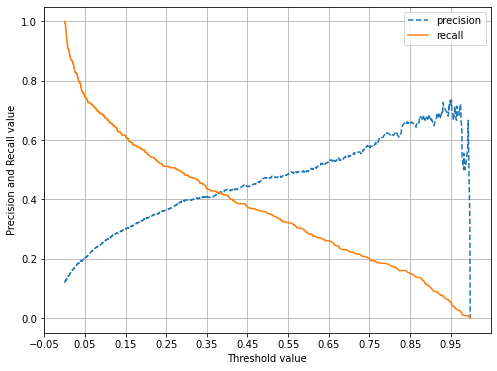

In [361]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] ) ####


In [362]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.34, 0.4405)

In [363]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.34
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3565  419]
 [ 267  270]]
정확도: 0.8483, 정밀도: 0.3919, 재현율: 0.5028, F1_score:  0.502793


In [364]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_bayes_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.34).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_오버샘플링기법boarderline_임계점_0.34_베이즈튜닝.csv', index = False)

## SVM_SMOTE

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [9]:
X_train, y_train = SVMSMOTE(random_state=0).fit_sample(X_train, y_train)

In [10]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(31868, 31), 테스트 세트 Shape:(4521, 31)
 학습 세트 레이블 값 분포 비율
True     0.5
False    0.5
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.881221
True     0.118779
Name: y, dtype: float64


# GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, verbose=3, n_jobs=-1, cv=3)

In [17]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="f1",
           eval_set=[(X_train, y_train), (X_test, y_test)])

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   22.4s finished


[1]	training's binary_logloss: 0.636585	valid_1's binary_logloss: 0.644346
Training until validation scores don't improve for 30 rounds
[2]	training's binary_logloss: 0.59035	valid_1's binary_logloss: 0.604615
[3]	training's binary_logloss: 0.550948	valid_1's binary_logloss: 0.570657
[4]	training's binary_logloss: 0.517902	valid_1's binary_logloss: 0.542221
[5]	training's binary_logloss: 0.489071	valid_1's binary_logloss: 0.517983
[6]	training's binary_logloss: 0.464881	valid_1's binary_logloss: 0.497885
[7]	training's binary_logloss: 0.442769	valid_1's binary_logloss: 0.479454
[8]	training's binary_logloss: 0.423741	valid_1's binary_logloss: 0.464488
[9]	training's binary_logloss: 0.40598	valid_1's binary_logloss: 0.451708
[10]	training's binary_logloss: 0.389901	valid_1's binary_logloss: 0.438604
[11]	training's binary_logloss: 0.375887	valid_1's binary_logloss: 0.428533
[12]	training's binary_logloss: 0.363139	valid_1's binary_logloss: 0.419675
[13]	training's binary_logloss: 0.3516

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=400), n_jobs=-1,
             param_grid={'max_depth': [128, 160],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsample': [0.8, 1]},
             verbose=3)

In [19]:
gridcv.best_estimator_

LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [20]:
lgbm_clf_best = LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [21]:
lgbm_clf_best.fit(X_train, y_train)

LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [22]:
##

pred_proba = lgbm_clf_best.predict_proba(X_test)
pred  = lgbm_clf_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.4369978  0.5630022 ]
 [0.97863351 0.02136649]
 [0.98463579 0.01536421]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.4369978  0.5630022  0.4369978  0.5630022 ]
 [0.97863351 0.02136649 0.97863351 0.02136649]
 [0.98463579 0.01536421 0.98463579 0.01536421]]


In [25]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3760  224]
 [ 362  175]]
정확도: 0.8704, 정밀도: 0.4386, 재현율: 0.3259, F1_score:  0.325885


In [26]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_best.predict_proba(X_test)[:, 1] 


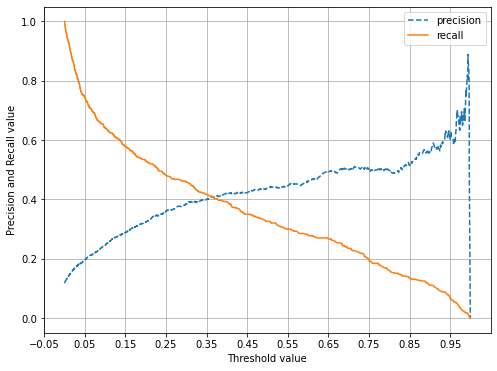

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] )


In [28]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_best, X_test, y_test)

(0.305, 0.4206)

In [29]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.305
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3601  383]
 [ 292  245]]
정확도: 0.8507, 정밀도: 0.3901, 재현율: 0.4562, F1_score:  0.456238


In [30]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.305).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_오버샘플링boarderline_임계점_0.305_그리드서치.csv', index = False)

## RandomizedSearchCV

In [31]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [32]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

lg_cl = LGBMClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.1min finished


LGBMClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
               min_samples_leaf=2, min_samples_split=10, n_estimators=1600)


In [33]:
lgb_random_best = LGBMClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
               min_samples_leaf=2, min_samples_split=10, n_estimators=1600)

In [34]:
lgb_random_best.fit(X_train, y_train)

LGBMClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
               min_samples_leaf=2, min_samples_split=10, n_estimators=1600)

In [35]:
## 1 ##

pred_proba = lgb_random_best.predict_proba(X_test)
pred  = lgb_random_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[2.73695164e-01 7.26304836e-01]
 [9.99558667e-01 4.41332563e-04]
 [9.91221831e-01 8.77816947e-03]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[2.73695164e-01 7.26304836e-01 2.73695164e-01 7.26304836e-01]
 [9.99558667e-01 4.41332563e-04 9.99558667e-01 4.41332563e-04]
 [9.91221831e-01 8.77816947e-03 9.91221831e-01 8.77816947e-03]]


In [36]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3763  221]
 [ 373  164]]
정확도: 0.8686, 정밀도: 0.4260, 재현율: 0.3054, F1_score:  0.305400


In [37]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgb_random_best.predict_proba(X_test)[:, 1] ###


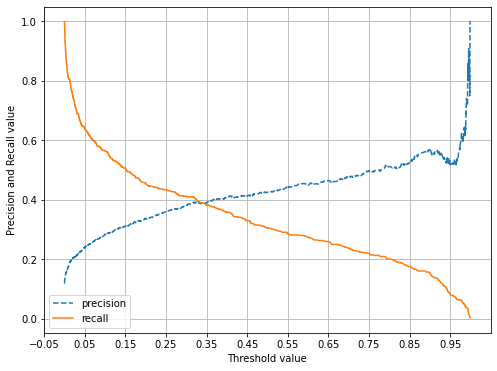

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgb_random_best.predict_proba(X_test)[:, 1]) ##


In [39]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgb_random_best, X_test, y_test)

(0.316, 0.3996)

In [40]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.316
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3640  344]
 [ 317  220]]
정확도: 0.8538, 정밀도: 0.3901, 재현율: 0.4097, F1_score:  0.409683


In [41]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgb_random_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.316).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_오버샘플링boarderline_임계점_0.316_랜덤서치.csv', index = False)

## BaysianOptimization

In [42]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [43]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [44]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [45]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 33, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 10, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.767049	valid_0's binary_logloss: 0.442683
best_iter: 55
roc_auc: 0.767049108912372
|  1        |  0.767    |  0.7744   |  9.722    |  32.12    |  0.05494  |  32.9     |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 36, 'colsample_bytree': 0.9818313802505146,

[100]	valid_0's auc: 0.770647	valid_0's binary_logloss: 0.387767
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.770647	valid_0's binary_logloss: 0.387767
best_iter: 100
roc_auc: 0.7706473005616506
|  11       |  0.7706   |  0.6794   |  12.0     |  50.0     |  0.1      |  45.0     |  0.0      |  0.5      |  0.8776   |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 29, 'colsample_bytree': 0.5062341532588821, 'subsample': 0.9764050195441845, 'max_depth': 5, 'reg_alpha': 0.02307415402978913, 'reg_lambda': 0.4945408698301356, 'min_split_gain': 0.014346922957909153, 'min_child_weight': 17.86368089580148, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.764876	valid_0's binary_logloss: 0.483295
best_iter: 50
roc_auc: 0.7648758441587578
|  12       |  0.7649   |  0.5062   |  4.718    |  17.86    |  0.01435  |  29.09    |  0.02307  |  0.4945   |  0.9764   |
params: {'

In [46]:
BO_lgb.max

{'target': 0.7765243936640417,
 'params': {'colsample_bytree': 0.587569337087346,
  'max_depth': 11.856288894265848,
  'min_child_weight': 12.405184260881068,
  'min_split_gain': 0.022926299920063124,
  'num_leaves': 38.68704705142052,
  'reg_alpha': 0.4776932915652607,
  'reg_lambda': 0.28572485736712083,
  'subsample': 0.5996447415656987}}

In [47]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.696902	valid_0's binary_logloss: 0.684167
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.705537	valid_0's binary_logloss: 0.677025
[3]	valid_0's auc: 0.713697	valid_0's binary_logloss: 0.668609
[4]	valid_0's auc: 0.728774	valid_0's binary_logloss: 0.660144
[5]	valid_0's auc: 0.733603	valid_0's binary_logloss: 0.652671
[6]	valid_0's auc: 0.736477	valid_0's binary_logloss: 0.644963
[7]	valid_0's auc: 0.733312	valid_0's binary_logloss: 0.637818
[8]	valid_0's auc: 0.750314	valid_0's binary_logloss: 0.630059
[9]	valid_0's auc: 0.755387	valid_0's binary_logloss: 0.622286
[10]	valid_0's auc: 0.755441	valid_0's binary_logloss: 0.615643
[11]	valid_0's auc: 0.758059	valid_0's binary_logloss: 0.60824
[12]	valid_0's auc: 0.758016	valid_0's binary_logloss: 0.602309
[13]	valid_0's auc: 0.760005	valid_0's binary_logloss: 0.595469
[14]	valid_0's auc: 0.763367	valid_0's binary_logloss: 0.589591
[15]	valid_0's auc: 0.762183	valid_0's binary_loglos

[129]	valid_0's auc: 0.774706	valid_0's binary_logloss: 0.367197
[130]	valid_0's auc: 0.774869	valid_0's binary_logloss: 0.366635
[131]	valid_0's auc: 0.774863	valid_0's binary_logloss: 0.366195
[132]	valid_0's auc: 0.774825	valid_0's binary_logloss: 0.365746
[133]	valid_0's auc: 0.774765	valid_0's binary_logloss: 0.365379
[134]	valid_0's auc: 0.774689	valid_0's binary_logloss: 0.364883
[135]	valid_0's auc: 0.774747	valid_0's binary_logloss: 0.364441
[136]	valid_0's auc: 0.774739	valid_0's binary_logloss: 0.363996
[137]	valid_0's auc: 0.774882	valid_0's binary_logloss: 0.363511
[138]	valid_0's auc: 0.774805	valid_0's binary_logloss: 0.363193
[139]	valid_0's auc: 0.77483	valid_0's binary_logloss: 0.362756
[140]	valid_0's auc: 0.774934	valid_0's binary_logloss: 0.362398
[141]	valid_0's auc: 0.775004	valid_0's binary_logloss: 0.361991
[142]	valid_0's auc: 0.774896	valid_0's binary_logloss: 0.361624
[143]	valid_0's auc: 0.774912	valid_0's binary_logloss: 0.361272
[144]	valid_0's auc: 0.774

In [48]:
lgbm_clf_bayes_best

LGBMClassifier(colsample_bytree=0.587569337087346, learning_rate=0.02,
               max_depth=12, min_child_weight=12.405184260881068,
               min_split_gain=0.022926299920063124, n_estimators=1000,
               num_leaves=39, reg_alpha=0.4776932915652607,
               reg_lambda=0.28572485736712083, subsample=0.5996447415656987)

In [49]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.587569337087346, learning_rate=0.02,
               max_depth=12, min_child_weight=12.405184260881068,
               min_split_gain=0.022926299920063124, n_estimators=1000,
               num_leaves=39, reg_alpha=0.4776932915652607,
               reg_lambda=0.28572485736712083, subsample=0.5996447415656987)

In [50]:
## 1 ##

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.41733181 0.58266819]
 [0.92534031 0.07465969]
 [0.97082178 0.02917822]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.41733181 0.58266819 0.4369978  0.5630022 ]
 [0.92534031 0.07465969 0.97863351 0.02136649]
 [0.97082178 0.02917822 0.98463579 0.01536421]]


In [51]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3747  237]
 [ 342  195]]
정확도: 0.8719, 정밀도: 0.4514, 재현율: 0.3631, F1_score:  0.363128


In [52]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###


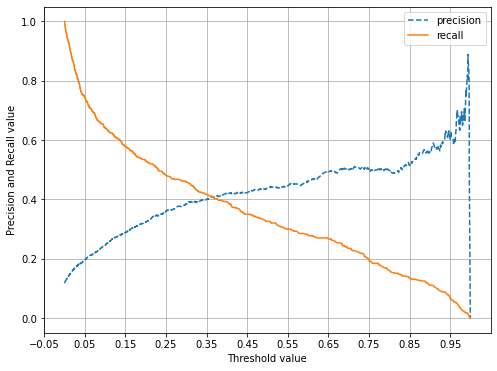

In [53]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] ) ####


In [54]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.274, 0.4373)

In [55]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.274
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3481  503]
 [ 246  291]]
정확도: 0.8343, 정밀도: 0.3665, 재현율: 0.5419, F1_score:  0.541899


In [57]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_bayes_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.274).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_오버샘플링기법boarderline_임계점_0.274_베이즈튜닝.csv', index = False)

# 복합 샘플링¶
- SMOTEENN: SMOTE + ENN
- SMOTETomek: SMOTE + Tomek
- from imblearn.combine import *

In [60]:
from imblearn.combine import *

### SMOTE+ENN
- SMOTE+ENN 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다.

In [366]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [367]:
X_train, y_train = SMOTEENN(random_state=0).fit_sample(X_train, y_train)

In [368]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(21500, 31), 테스트 세트 Shape:(4521, 31)
 학습 세트 레이블 값 분포 비율
True     0.597349
False    0.402651
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.881221
True     0.118779
Name: y, dtype: float64


## GridSearchCV

In [369]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, verbose=3, n_jobs=-1, cv=3)

In [370]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="f1",
           eval_set=[(X_train, y_train), (X_test, y_test)])

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    9.3s finished


[1]	training's binary_logloss: 0.619591	valid_1's binary_logloss: 0.799763
Training until validation scores don't improve for 30 rounds
[2]	training's binary_logloss: 0.574313	valid_1's binary_logloss: 0.749504
[3]	training's binary_logloss: 0.536834	valid_1's binary_logloss: 0.709263
[4]	training's binary_logloss: 0.50486	valid_1's binary_logloss: 0.675426
[5]	training's binary_logloss: 0.477165	valid_1's binary_logloss: 0.646828
[6]	training's binary_logloss: 0.453471	valid_1's binary_logloss: 0.622646
[7]	training's binary_logloss: 0.433127	valid_1's binary_logloss: 0.60313
[8]	training's binary_logloss: 0.41419	valid_1's binary_logloss: 0.58476
[9]	training's binary_logloss: 0.395073	valid_1's binary_logloss: 0.565371
[10]	training's binary_logloss: 0.379078	valid_1's binary_logloss: 0.550604
[11]	training's binary_logloss: 0.365225	valid_1's binary_logloss: 0.53826
[12]	training's binary_logloss: 0.352589	valid_1's binary_logloss: 0.527453
[13]	training's binary_logloss: 0.341032	

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=400), n_jobs=-1,
             param_grid={'max_depth': [128, 160],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsample': [0.8, 1]},
             verbose=3)

In [371]:
gridcv.best_estimator_

LGBMClassifier(max_depth=128, min_child_samples=60, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [372]:
lgbm_clf_best = LGBMClassifier(max_depth=128, min_child_samples=60, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [373]:
lgbm_clf_best.fit(X_train, y_train)

LGBMClassifier(max_depth=128, min_child_samples=60, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [374]:
##

pred_proba = lgbm_clf_best.predict_proba(X_test)
pred  = lgbm_clf_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[9.90422107e-02 9.00957789e-01]
 [9.08011525e-01 9.19884746e-02]
 [9.99885883e-01 1.14117051e-04]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[9.90422107e-02 9.00957789e-01 9.90422107e-02 9.00957789e-01]
 [9.08011525e-01 9.19884746e-02 9.08011525e-01 9.19884746e-02]
 [9.99885883e-01 1.14117051e-04 9.99885883e-01 1.14117051e-04]]


In [375]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3534  450]
 [ 282  255]]
정확도: 0.8381, 정밀도: 0.3617, 재현율: 0.4749, F1_score:  0.474860


In [376]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_best.predict_proba(X_test)[:, 1] 


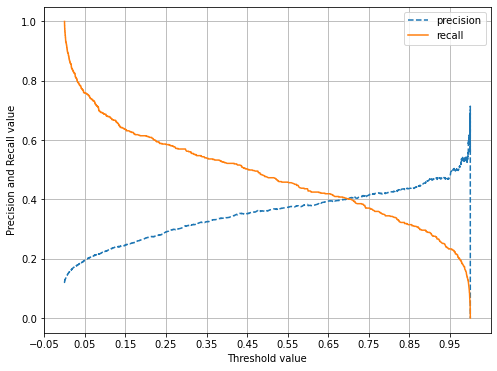

In [377]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] )


In [378]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_best, X_test, y_test)

(0.43, 0.4184)

In [379]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.43
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3474  510]
 [ 260  277]]
정확도: 0.8297, 정밀도: 0.3520, 재현율: 0.5158, F1_score:  0.515829


In [380]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.43).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_복합샘플링smo_enn_임계점_0.43_그리드서치.csv', index = False)

## RandomizedGridSearchCV

In [381]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [382]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

lg_cl = LGBMClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.1min finished


LGBMClassifier(bootstrap=True, max_depth=10, max_features='sqrt',
               min_samples_leaf=4, min_samples_split=5, n_estimators=2000)


In [384]:
lgb_random_best = LGBMClassifier(bootstrap=True, max_depth=10, max_features='sqrt',
               min_samples_leaf=4, min_samples_split=5, n_estimators=2000)

In [385]:
lgb_random_best.fit(X_train, y_train)

LGBMClassifier(bootstrap=True, max_depth=10, max_features='sqrt',
               min_samples_leaf=4, min_samples_split=5, n_estimators=2000)

In [386]:
## 1 ##

pred_proba = lgb_random_best.predict_proba(X_test)
pred  = lgb_random_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[7.39142733e-02 9.26085727e-01]
 [9.70903073e-01 2.90969267e-02]
 [9.99995750e-01 4.25033575e-06]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[7.39142733e-02 9.26085727e-01 7.39142733e-02 9.26085727e-01]
 [9.70903073e-01 2.90969267e-02 9.70903073e-01 2.90969267e-02]
 [9.99995750e-01 4.25033575e-06 9.99995750e-01 4.25033575e-06]]


In [387]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3540  444]
 [ 287  250]]
정확도: 0.8383, 정밀도: 0.3602, 재현율: 0.4655, F1_score:  0.465549


In [388]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgb_random_best.predict_proba(X_test)[:, 1] ###


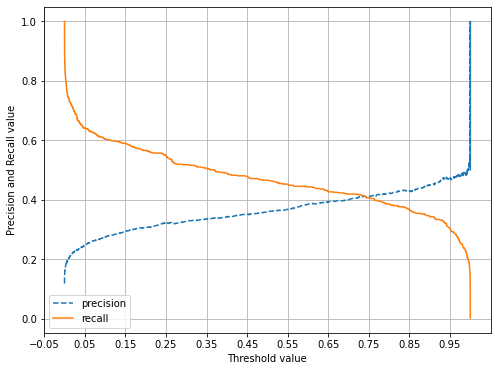

In [389]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgb_random_best.predict_proba(X_test)[:, 1]) ##


In [390]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgb_random_best, X_test, y_test)

(0.61, 0.4132)

In [391]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.61
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3607  377]
 [ 299  238]]
정확도: 0.8505, 정밀도: 0.3870, 재현율: 0.4432, F1_score:  0.443203


In [409]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgb_random_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.61).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_복합샘플링smo_enn_임계점_0.61_랜덤서치.csv', index = False)

## BaysianOptimization

In [393]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [394]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [395]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [396]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 33, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 10, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.752013	valid_0's binary_logloss: 0.492962
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.752013	valid_0's binary_logloss: 0.492962
best_iter: 100
roc_auc: 0.7520134074472938
|  1        |  0.752    |  0.7744   |  9.722    |  32.12    |  0.05494  |  32.9     |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200,

In [397]:
BO_lgb.max

{'target': 0.7612954144324038,
 'params': {'colsample_bytree': 1.0,
  'max_depth': 12.0,
  'min_child_weight': 5.0,
  'min_split_gain': 0.1,
  'num_leaves': 37.896561240852954,
  'reg_alpha': 0.0,
  'reg_lambda': 0.0,
  'subsample': 1.0}}

In [398]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.734486	valid_0's binary_logloss: 0.850023
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.734836	valid_0's binary_logloss: 0.837838
[3]	valid_0's auc: 0.73618	valid_0's binary_logloss: 0.826349
[4]	valid_0's auc: 0.736342	valid_0's binary_logloss: 0.815337
[5]	valid_0's auc: 0.735414	valid_0's binary_logloss: 0.804787
[6]	valid_0's auc: 0.736608	valid_0's binary_logloss: 0.794741
[7]	valid_0's auc: 0.737593	valid_0's binary_logloss: 0.784794
[8]	valid_0's auc: 0.737434	valid_0's binary_logloss: 0.77552
[9]	valid_0's auc: 0.738972	valid_0's binary_logloss: 0.766183
[10]	valid_0's auc: 0.738674	valid_0's binary_logloss: 0.757539
[11]	valid_0's auc: 0.737979	valid_0's binary_logloss: 0.749248
[12]	valid_0's auc: 0.740423	valid_0's binary_logloss: 0.740885
[13]	valid_0's auc: 0.741805	valid_0's binary_logloss: 0.73312
[14]	valid_0's auc: 0.743054	valid_0's binary_logloss: 0.72538
[15]	valid_0's auc: 0.742683	valid_0's binary_logloss: 

In [399]:
lgbm_clf_bayes_best

LGBMClassifier(learning_rate=0.02, max_depth=12, min_child_weight=5.0,
               min_split_gain=0.1, n_estimators=1000, num_leaves=38)

In [400]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.02, max_depth=12, min_child_weight=5.0,
               min_split_gain=0.1, n_estimators=1000, num_leaves=38)

In [401]:
## 1 ##

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.28881466 0.71118534]
 [0.80644182 0.19355818]
 [0.99112246 0.00887754]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[2.88814659e-01 7.11185341e-01 9.90422107e-02 9.00957789e-01]
 [8.06441817e-01 1.93558183e-01 9.08011525e-01 9.19884746e-02]
 [9.91122459e-01 8.87754081e-03 9.99885883e-01 1.14117051e-04]]


In [402]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3545  439]
 [ 279  258]]
정확도: 0.8412, 정밀도: 0.3702, 재현율: 0.4804, F1_score:  0.480447


In [403]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###


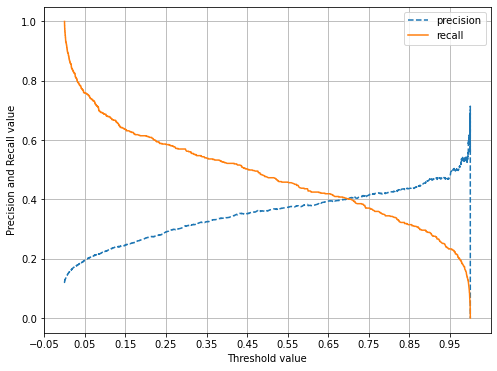

In [404]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] ) ####


In [405]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.6, 0.4352)

In [406]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.6
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3640  344]
 [ 292  245]]
정확도: 0.8593, 정밀도: 0.4160, 재현율: 0.4562, F1_score:  0.456238


In [408]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_bayes_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.6).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_복합샘플링smo_enn_임계점_0.6_베이즈튜닝.csv', index = False)

### SMOTE+Tomek¶
- SMOTE+Tomek 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 토멕링크 방법을 섞은 것이다.

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [62]:
X_train, y_train = SMOTETomek(random_state=0).fit_sample(X_train, y_train)

In [63]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(30686, 31), 테스트 세트 Shape:(4521, 31)
 학습 세트 레이블 값 분포 비율
True     0.5
False    0.5
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.881221
True     0.118779
Name: y, dtype: float64


## GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, verbose=3, n_jobs=-1, cv=3)

In [65]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="f1",
           eval_set=[(X_train, y_train), (X_test, y_test)])

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   24.4s finished


[1]	training's binary_logloss: 0.641886	valid_1's binary_logloss: 0.650269
Training until validation scores don't improve for 30 rounds
[2]	training's binary_logloss: 0.59947	valid_1's binary_logloss: 0.615429
[3]	training's binary_logloss: 0.559838	valid_1's binary_logloss: 0.583796
[4]	training's binary_logloss: 0.528398	valid_1's binary_logloss: 0.556987
[5]	training's binary_logloss: 0.502434	valid_1's binary_logloss: 0.536091
[6]	training's binary_logloss: 0.476675	valid_1's binary_logloss: 0.515882
[7]	training's binary_logloss: 0.456653	valid_1's binary_logloss: 0.500033
[8]	training's binary_logloss: 0.439492	valid_1's binary_logloss: 0.486742
[9]	training's binary_logloss: 0.424246	valid_1's binary_logloss: 0.474673
[10]	training's binary_logloss: 0.41096	valid_1's binary_logloss: 0.464813
[11]	training's binary_logloss: 0.399617	valid_1's binary_logloss: 0.45667
[12]	training's binary_logloss: 0.385683	valid_1's binary_logloss: 0.445956
[13]	training's binary_logloss: 0.37208

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=400), n_jobs=-1,
             param_grid={'max_depth': [128, 160],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsample': [0.8, 1]},
             verbose=3)

In [66]:
gridcv.best_estimator_

LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [67]:
lgbm_clf_best = LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [68]:
lgbm_clf_best.fit(X_train, y_train)

LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=400,
               num_leaves=64, subsample=0.8)

In [69]:
##

pred_proba = lgbm_clf_best.predict_proba(X_test)
pred  = lgbm_clf_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.99875201 0.00124799]
 [0.9939449  0.0060551 ]
 [0.88752395 0.11247605]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.99875201 0.00124799 0.99875201 0.00124799]
 [0.9939449  0.0060551  0.9939449  0.0060551 ]
 [0.88752395 0.11247605 0.88752395 0.11247605]]


In [70]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3708  276]
 [ 348  189]]
정확도: 0.8620, 정밀도: 0.4065, 재현율: 0.3520, F1_score:  0.351955


In [71]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_best.predict_proba(X_test)[:, 1] 


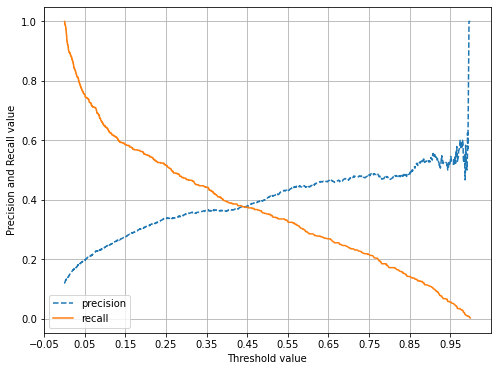

In [72]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] )


In [73]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_best, X_test, y_test)

(0.244, 0.4096)

In [74]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.244
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3430  554]
 [ 256  281]]
정확도: 0.8208, 정밀도: 0.3365, 재현율: 0.5233, F1_score:  0.523277


In [75]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.244).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_복합샘플링smo_tomek_임계점_0.244_그리드서치.csv', index = False)

## RandomizedGridSearchCV

In [76]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [77]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

lg_cl = LGBMClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.6min finished


LGBMClassifier(bootstrap=True, max_depth=20, max_features='auto',
               min_samples_leaf=2, min_samples_split=5, n_estimators=2000)


In [78]:
lgb_random_best = LGBMClassifier(bootstrap=True, max_depth=20, max_features='auto',
               min_samples_leaf=2, min_samples_split=5, n_estimators=2000)

In [79]:
lgb_random_best.fit(X_train, y_train)

LGBMClassifier(bootstrap=True, max_depth=20, max_features='auto',
               min_samples_leaf=2, min_samples_split=5, n_estimators=2000)

In [80]:
## 1 ##

pred_proba = lgb_random_best.predict_proba(X_test)
pred  = lgb_random_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[9.99834312e-01 1.65688064e-04]
 [9.99950143e-01 4.98572410e-05]
 [8.91647099e-01 1.08352901e-01]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[9.99834312e-01 1.65688064e-04 9.99834312e-01 1.65688064e-04]
 [9.99950143e-01 4.98572410e-05 9.99950143e-01 4.98572410e-05]
 [8.91647099e-01 1.08352901e-01 8.91647099e-01 1.08352901e-01]]


In [81]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3729  255]
 [ 342  195]]
정확도: 0.8679, 정밀도: 0.4333, 재현율: 0.3631, F1_score:  0.363128


In [82]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgb_random_best.predict_proba(X_test)[:, 1] ###


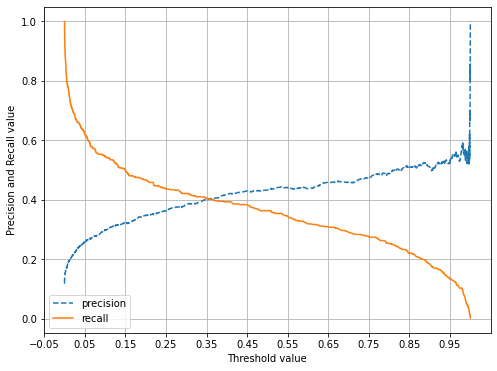

In [83]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgb_random_best.predict_proba(X_test)[:, 1]) ##


In [84]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgb_random_best, X_test, y_test)

(0.406, 0.4066)

In [85]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.406
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3694  290]
 [ 326  211]]
정확도: 0.8637, 정밀도: 0.4212, 재현율: 0.3929, F1_score:  0.392924


In [86]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgb_random_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.406).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_복합샘플링smo_tomek_임계점_0.406_랜덤서치.csv', index = False)

## BaysianOptimization

In [87]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [88]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [89]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [90]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 33, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 10, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.76224	valid_0's binary_logloss: 0.411474
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.762407	valid_0's binary_logloss: 0.413047
best_iter: 98
roc_auc: 0.7624074042912805
|  1        |  0.7624   |  0.7744   |  9.722    |  32.12    |  0.05494  |  32.9     |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, 'l

[100]	valid_0's auc: 0.76988	valid_0's binary_logloss: 0.42104
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.770223	valid_0's binary_logloss: 0.422796
best_iter: 98
roc_auc: 0.770223351506585
|  11       |  0.7702   |  0.5      |  12.0     |  15.11    |  0.1      |  24.0     |  0.06382  |  0.5      |  1.0      |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 24, 'colsample_bytree': 1.0, 'subsample': 0.5, 'max_depth': 4, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'min_split_gain': 0.1, 'min_child_weight': 8.697386162306694, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.748286	valid_0's binary_logloss: 0.462875
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.74863	valid_0's binary_logloss: 0.464588
best_iter: 98
roc_auc: 0.7486302285492061
|  12       |  0.7486   |  1.0      |  4.0      |  8.697    |  0.1      |  24.0     |  0.0      |  0.0      |  0.5      |
params: {'n_esti

In [91]:
BO_lgb.max

{'target': 0.77580713917121,
 'params': {'colsample_bytree': 0.5087933828642489,
  'max_depth': 11.526994350648547,
  'min_child_weight': 10.948516025834174,
  'min_split_gain': 0.03238732017224211,
  'num_leaves': 41.43777953724648,
  'reg_alpha': 0.04816678770480341,
  'reg_lambda': 0.4517188037828811,
  'subsample': 0.9922570571414876}}

In [92]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.671572	valid_0's binary_logloss: 0.685828
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.668195	valid_0's binary_logloss: 0.679323
[3]	valid_0's auc: 0.686448	valid_0's binary_logloss: 0.672907
[4]	valid_0's auc: 0.703878	valid_0's binary_logloss: 0.665481
[5]	valid_0's auc: 0.716533	valid_0's binary_logloss: 0.659043
[6]	valid_0's auc: 0.723856	valid_0's binary_logloss: 0.652171
[7]	valid_0's auc: 0.724731	valid_0's binary_logloss: 0.646602
[8]	valid_0's auc: 0.73665	valid_0's binary_logloss: 0.640411
[9]	valid_0's auc: 0.745563	valid_0's binary_logloss: 0.633365
[10]	valid_0's auc: 0.747816	valid_0's binary_logloss: 0.627589
[11]	valid_0's auc: 0.751075	valid_0's binary_logloss: 0.621002
[12]	valid_0's auc: 0.749503	valid_0's binary_logloss: 0.616107
[13]	valid_0's auc: 0.750933	valid_0's binary_logloss: 0.610876
[14]	valid_0's auc: 0.757905	valid_0's binary_logloss: 0.605609
[15]	valid_0's auc: 0.757893	valid_0's binary_loglos

[143]	valid_0's auc: 0.77596	valid_0's binary_logloss: 0.381848
[144]	valid_0's auc: 0.775932	valid_0's binary_logloss: 0.3815
[145]	valid_0's auc: 0.775874	valid_0's binary_logloss: 0.380963
[146]	valid_0's auc: 0.776459	valid_0's binary_logloss: 0.380206
[147]	valid_0's auc: 0.776469	valid_0's binary_logloss: 0.379756
[148]	valid_0's auc: 0.777101	valid_0's binary_logloss: 0.378979
[149]	valid_0's auc: 0.777028	valid_0's binary_logloss: 0.378718
[150]	valid_0's auc: 0.777316	valid_0's binary_logloss: 0.378331
[151]	valid_0's auc: 0.777316	valid_0's binary_logloss: 0.377945
[152]	valid_0's auc: 0.77742	valid_0's binary_logloss: 0.377652
[153]	valid_0's auc: 0.778038	valid_0's binary_logloss: 0.376954
[154]	valid_0's auc: 0.778241	valid_0's binary_logloss: 0.376478
[155]	valid_0's auc: 0.778141	valid_0's binary_logloss: 0.376094
[156]	valid_0's auc: 0.778328	valid_0's binary_logloss: 0.375554
[157]	valid_0's auc: 0.778338	valid_0's binary_logloss: 0.375076
[158]	valid_0's auc: 0.778117

[288]	valid_0's auc: 0.774374	valid_0's binary_logloss: 0.351771
[289]	valid_0's auc: 0.774374	valid_0's binary_logloss: 0.351736
[290]	valid_0's auc: 0.774348	valid_0's binary_logloss: 0.351646
[291]	valid_0's auc: 0.774065	valid_0's binary_logloss: 0.3516
[292]	valid_0's auc: 0.774024	valid_0's binary_logloss: 0.351561
[293]	valid_0's auc: 0.773937	valid_0's binary_logloss: 0.351501
[294]	valid_0's auc: 0.77407	valid_0's binary_logloss: 0.351417
[295]	valid_0's auc: 0.773926	valid_0's binary_logloss: 0.351398
[296]	valid_0's auc: 0.773879	valid_0's binary_logloss: 0.351365
[297]	valid_0's auc: 0.773795	valid_0's binary_logloss: 0.351334
[298]	valid_0's auc: 0.773627	valid_0's binary_logloss: 0.351356
[299]	valid_0's auc: 0.773563	valid_0's binary_logloss: 0.351353
[300]	valid_0's auc: 0.773414	valid_0's binary_logloss: 0.351354
[301]	valid_0's auc: 0.773515	valid_0's binary_logloss: 0.351219
[302]	valid_0's auc: 0.773452	valid_0's binary_logloss: 0.351178
[303]	valid_0's auc: 0.77350

In [93]:
lgbm_clf_bayes_best

LGBMClassifier(colsample_bytree=0.5087933828642489, learning_rate=0.02,
               max_depth=12, min_child_weight=10.948516025834174,
               min_split_gain=0.03238732017224211, n_estimators=1000,
               num_leaves=41, reg_alpha=0.04816678770480341,
               reg_lambda=0.4517188037828811, subsample=0.9922570571414876)

In [94]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.5087933828642489, learning_rate=0.02,
               max_depth=12, min_child_weight=10.948516025834174,
               min_split_gain=0.03238732017224211, n_estimators=1000,
               num_leaves=41, reg_alpha=0.04816678770480341,
               reg_lambda=0.4517188037828811, subsample=0.9922570571414876)

In [95]:
## 1 ##

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.98640431 0.01359569]
 [0.96947881 0.03052119]
 [0.69422109 0.30577891]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.98640431 0.01359569 0.99875201 0.00124799]
 [0.96947881 0.03052119 0.9939449  0.0060551 ]
 [0.69422109 0.30577891 0.88752395 0.11247605]]


In [96]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3699  285]
 [ 333  204]]
정확도: 0.8633, 정밀도: 0.4172, 재현율: 0.3799, F1_score:  0.379888


In [97]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###


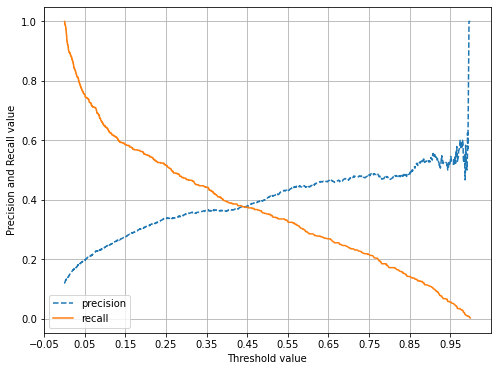

In [98]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] ) ####


In [100]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.372, 0.4172)

In [101]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.372
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3546  438]
 [ 280  257]]
정확도: 0.8412, 정밀도: 0.3698, 재현율: 0.4786, F1_score:  0.478585


In [102]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_bayes_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.372).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./lgbm_clf_복합샘플링smo_tomek_임계점_0.372_베이즈튜닝.csv', index = False)

# END